<a href="https://colab.research.google.com/github/Tamtu55/ShoeSysOOPS/blob/main/Occlusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/cv-1.png")

(1, 1, 3)


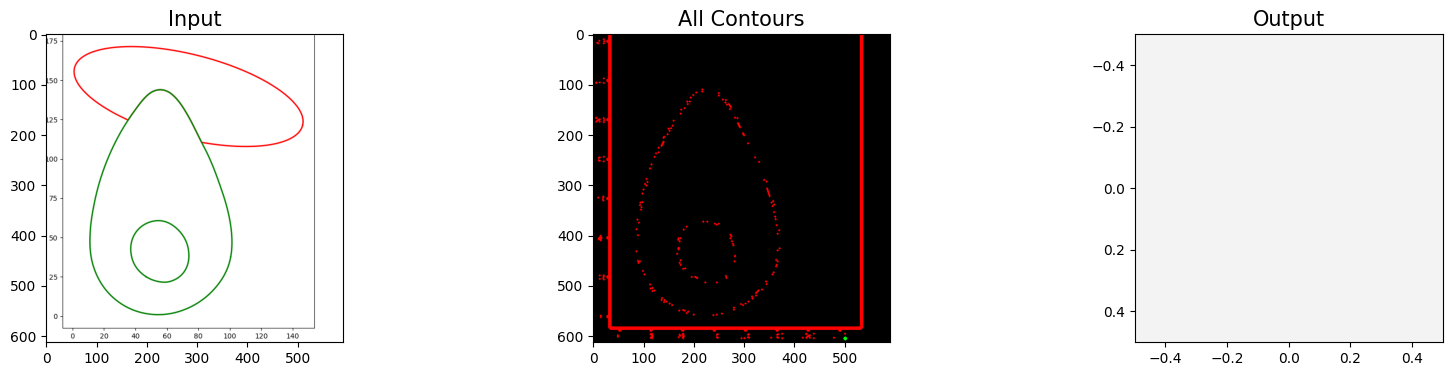

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

font = {'fontsize': 15}  # Example font dictionary

# Load the image
image_path = '/content/cv-1.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Red color boundaries [B, G, R]
lower = [np.mean(image[:, :, channel] - np.std(image[:, :, channel]) / 3) for channel in range(3)]
upper = [250, 250, 250]

# Create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

# Find the colors within the specified boundaries and apply the mask
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)

# Thresholding
ret, thresh = cv2.threshold(mask, 40, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) != 0:
    # Draw in blue the contours that were found
    cv2.drawContours(output, contours, -1, 255, 3)

    # Find the biggest contour by the area
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # Draw the biggest contour in green
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 5)

    # Extract the region of interest (ROI)
    foreground = image[y:y + h, x:x + w]

    # Display the results
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input", fontdict=font)
    plt.subplot(1, 3, 2), plt.imshow(output), plt.title("All Contours", fontdict=font)
    plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Output", fontdict=font)
    print(foreground.shape)
    plt.show()



In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }

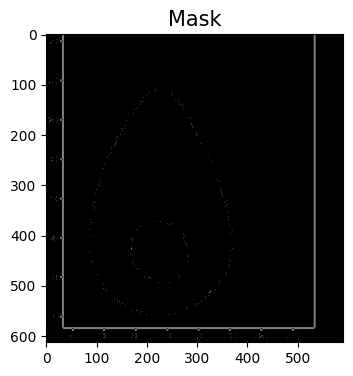

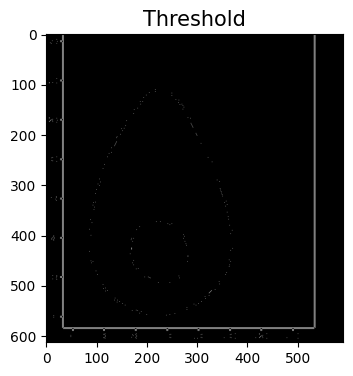

(1, 1, 3)


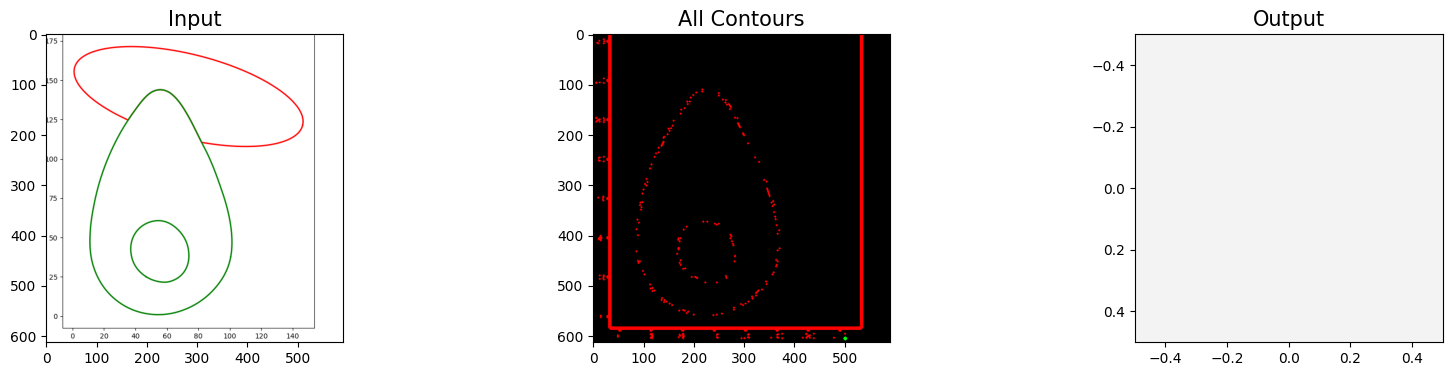

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

font = {'fontsize': 15}  # Example font dictionary

# Load the image
image_path = '/content/cv-1.png'
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Red color boundaries [B, G, R]
    lower = [np.mean(image[:, :, channel] - np.std(image[:, :, channel]) / 3) for channel in range(3)]
    upper = [250, 250, 250]

    # Create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)

    # Display the mask to check if it's correct
    plt.figure(figsize=(10, 4))
    plt.imshow(mask, cmap='gray')
    plt.title("Mask", fontdict=font)
    plt.show()

    output = cv2.bitwise_and(image, image, mask=mask)

    # Thresholding
    ret, thresh = cv2.threshold(mask, 40, 255, 0)

    # Display the thresholded image
    plt.figure(figsize=(10, 4))
    plt.imshow(thresh, cmap='gray')
    plt.title("Threshold", fontdict=font)
    plt.show()

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) == 0:
        print("No contours found.")
    else:
        # Draw in blue the contours that were found
        cv2.drawContours(output, contours, -1, 255, 3)

        # Find the biggest contour by area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Draw the biggest contour in green
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 5)

        # Extract the region of interest (ROI)
        foreground = image[y:y + h, x:x + w]

        # Display the results
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input", fontdict=font)
        plt.subplot(1, 3, 2), plt.imshow(output), plt.title("All Contours", fontdict=font)
        plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Output", fontdict=font)
        print(foreground.shape)
        plt.show()


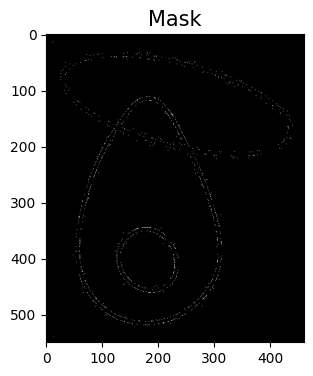

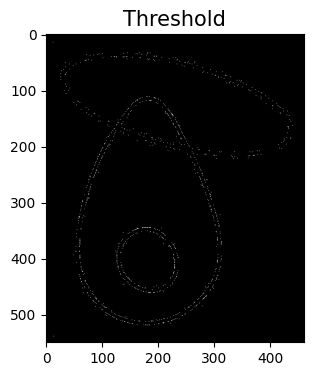

(2, 3, 3)


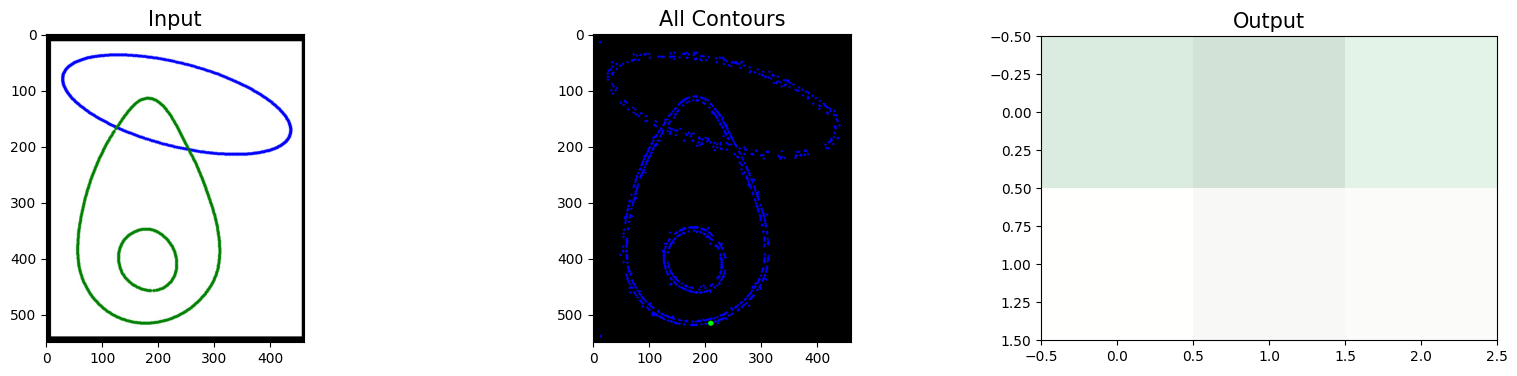

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

font = {'fontsize': 15}  # Example font dictionary

# Load the image
image_path = '/content/occ.jpeg'
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define color boundaries [R, G, B]
    lower = [np.mean(image[:, :, channel] - np.std(image[:, :, channel]) / 3) for channel in range(3)]
    upper = [250, 250, 250]

    # Create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Create a mask based on the color boundaries
    mask = cv2.inRange(image, lower, upper)

    # Display the mask to check if it's correct
    plt.figure(figsize=(10, 4))
    plt.imshow(mask, cmap='gray')
    plt.title("Mask", fontdict=font)
    plt.show()

    # Apply the mask to the original image
    output = cv2.bitwise_and(image, image, mask=mask)

    # Apply thresholding to the mask
    ret, thresh = cv2.threshold(mask, 40, 255, 0)

    # Display the thresholded image
    plt.figure(figsize=(10, 4))
    plt.imshow(thresh, cmap='gray')
    plt.title("Threshold", fontdict=font)
    plt.show()

    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) == 0:
        print("No contours found.")
    else:
        # Draw all contours in blue
        cv2.drawContours(output, contours, -1, (0, 0, 255), 3)

        # Find the largest contour by area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Draw the bounding box of the largest contour in green
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 5)

        # Extract the region of interest (ROI) based on the largest contour
        foreground = image[y:y + h, x:x + w]

        # Display the results
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input", fontdict=font)
        plt.subplot(1, 3, 2), plt.imshow(output), plt.title("All Contours", fontdict=font)
        plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Output", fontdict=font)
        print(foreground.shape)
        plt.show()


In [ ]:
def complete_shape_linear(contour):
    # Assuming contour is a NumPy array of points with shape (n, 1, 2)
    # where n is the number of points in the contour.

    # Example: Add a straight line between the first and last points to "close" the shape
    if len(contour) > 1:
        # Add an extra dimension to the first point to match the contour's shape
        first_point = contour[0].reshape(1, 1, 2)

        # Stack the first point to the end of the contour to "close" the shape
        completed_shape = np.vstack([contour, first_point])
    else:
        # If the contour has less than 2 points, return it as is
        completed_shape = contour

    return completed_shape


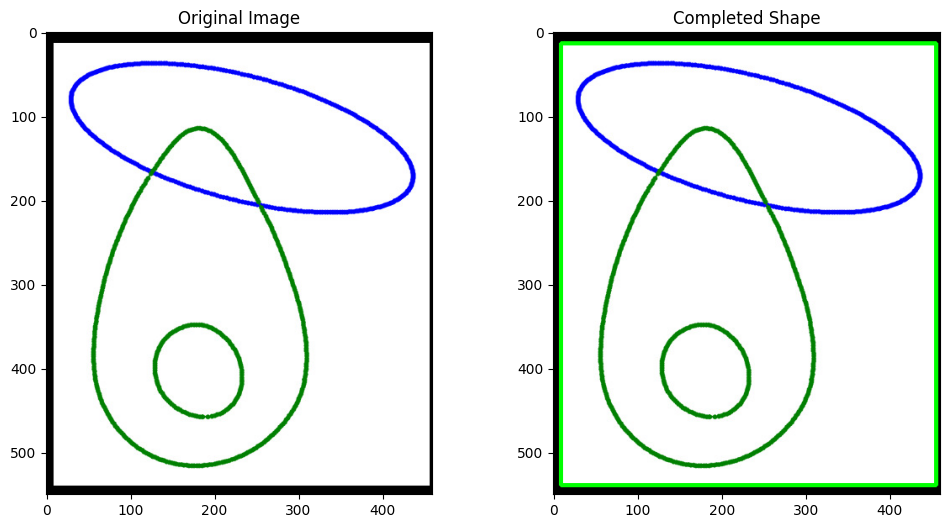

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def complete_shape(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        c = max(contours, key=cv2.contourArea)

        # Approximate the contour
        epsilon = 0.01 * cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, epsilon, True)

        # Perform shape completion (example: simple linear interpolation)
        completed_shape = complete_shape_linear(approx)

        # Draw the completed shape on the image
        output = image.copy()
        cv2.drawContours(output, [completed_shape], -1, (0, 255, 0), 3)

        return output
    else:
        print("No contours found.")
        return image

def complete_shape_linear(contour):
    # Assuming contour is a NumPy array of points with shape (n, 1, 2)
    # where n is the number of points in the contour.

    # Example: Add a straight line between the first and last points to "close" the shape
    if len(contour) > 1:
        # Add an extra dimension to the first point to match the contour's shape
        first_point = contour[0].reshape(1, 1, 2)

        # Stack the first point to the end of the contour to "close" the shape
        completed_shape = np.vstack([contour, first_point])
    else:
        # If the contour has less than 2 points, return it as is
        completed_shape = contour

    return completed_shape

# Main code
image_path = '/content/occ.jpeg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform shape completion
    completed_image = complete_shape(image)

    # Display the original and completed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(completed_image), plt.title("Completed Shape")
    plt.show()


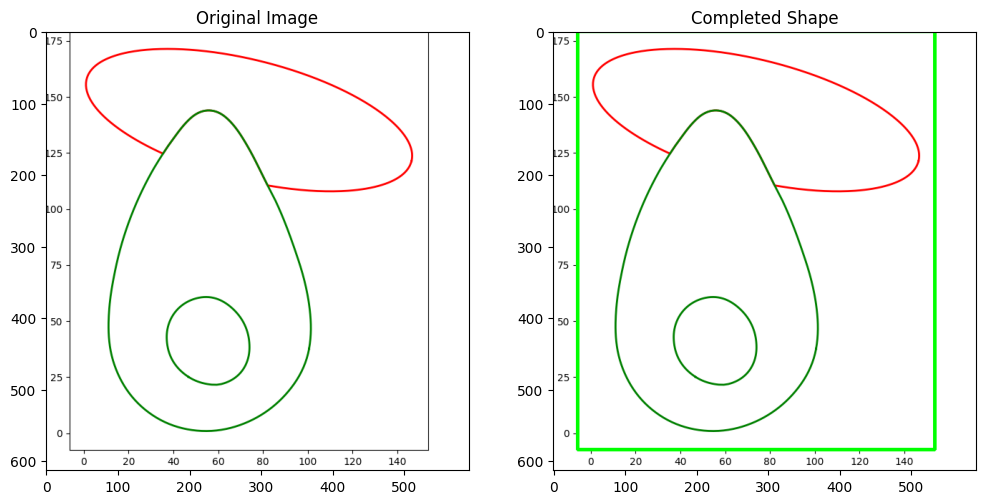

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def complete_shape(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        c = max(contours, key=cv2.contourArea)

        # Approximate the contour
        epsilon = 0.01 * cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, epsilon, True)

        # Perform shape completion (example: simple linear interpolation)
        completed_shape = complete_shape_linear(approx)

        # Draw the completed shape on the image
        output = image.copy()
        cv2.drawContours(output, [completed_shape], -1, (0, 255, 0), 3)

        return output
    else:
        print("No contours found.")
        return image

def complete_shape_linear(contour):
    # Assuming contour is a NumPy array of points with shape (n, 1, 2)
    # where n is the number of points in the contour.

    # Example: Add a straight line between the first and last points to "close" the shape
    if len(contour) > 1:
        # Add an extra dimension to the first point to match the contour's shape
        first_point = contour[0].reshape(1, 1, 2)

        # Stack the first point to the end of the contour to "close" the shape
        completed_shape = np.vstack([contour, first_point])
    else:
        # If the contour has less than 2 points, return it as is
        completed_shape = contour

    return completed_shape

# Main code
image_path = '/content/cv-1.png'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform shape completion
    completed_image = complete_shape(image)

    # Display the original and completed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(completed_image), plt.title("Completed Shape")
    plt.show()


Image loaded successfully.


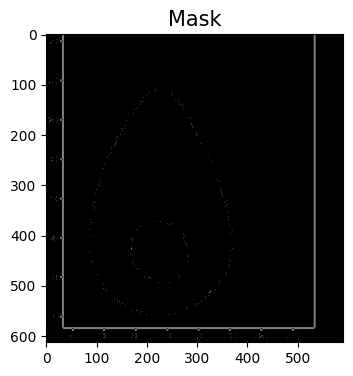

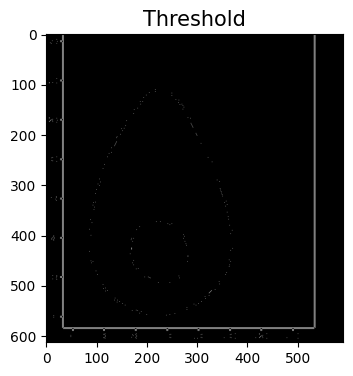

Number of contours found: 281
Contours found, processing...
(1, 1, 3)


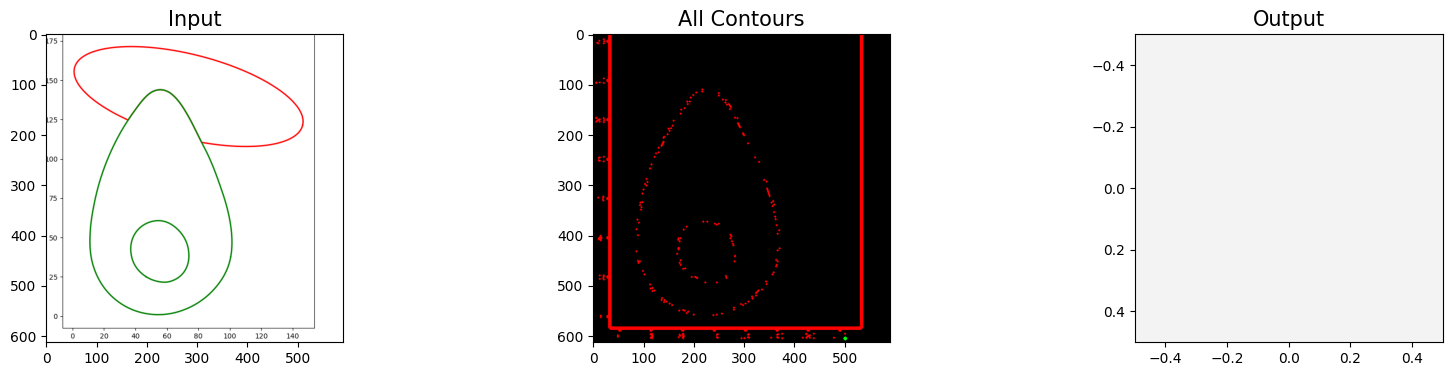

Output image saved at /content/occ.jpeg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

font = {'fontsize': 15}  # Example font dictionary

# Load the image
input_image_path = '/content/cv-1.png'
output_image_path = '/content/occ.jpeg'

image = cv2.imread(input_image_path)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    print("Image loaded successfully.")

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Red color boundaries [B, G, R]
    lower = [np.mean(image[:, :, channel] - np.std(image[:, :, channel]) / 3) for channel in range(3)]
    upper = [250, 250, 250]

    # Create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)

    # Display the mask to check if it's correct
    plt.figure(figsize=(10, 4))
    plt.imshow(mask, cmap='gray')
    plt.title("Mask", fontdict=font)
    plt.show()

    output = cv2.bitwise_and(image, image, mask=mask)

    # Thresholding
    ret, thresh = cv2.threshold(mask, 40, 255, 0)

    # Display the thresholded image
    plt.figure(figsize=(10, 4))
    plt.imshow(thresh, cmap='gray')
    plt.title("Threshold", fontdict=font)
    plt.show()

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(f"Number of contours found: {len(contours)}")

    if len(contours) == 0:
        print("No contours found.")
    else:
        print("Contours found, processing...")

        # Draw in blue the contours that were found
        cv2.drawContours(output, contours, -1, 255, 3)

        # Find the biggest contour by area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Draw the biggest contour in green
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 5)

        # Extract the region of interest (ROI)
        foreground = image[y:y + h, x:x + w]

        # Save the output image
        output_bgr = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)  # Convert back to BGR before saving
        cv2.imwrite(output_image_path, output_bgr)

        # Display the results
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input", fontdict=font)
        plt.subplot(1, 3, 2), plt.imshow(output), plt.title("All Contours", fontdict=font)
        plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Output", fontdict=font)
        print(foreground.shape)
        plt.show()

        print(f"Output image saved at {output_image_path}")


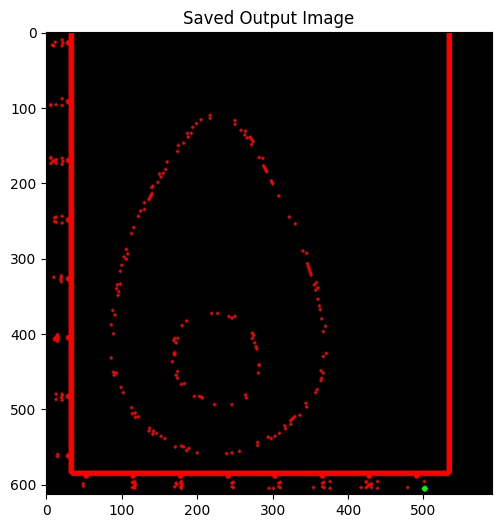

In [ ]:
# Load the saved output image
output_image_path = '/content/occ.jpeg'
saved_image = cv2.imread(output_image_path)

# Convert from BGR to RGB for displaying
saved_image_rgb = cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB)

# Display the saved image
plt.figure(figsize=(10, 6))
plt.imshow(saved_image_rgb)
plt.title("Saved Output Image")
plt.show()


Image loaded successfully.


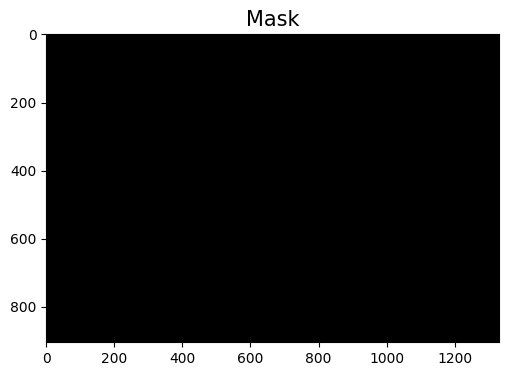

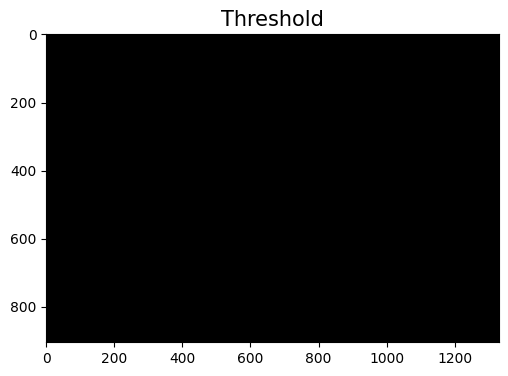

Number of contours found: 0
No contours found.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

font = {'fontsize': 15}  # Example font dictionary

# Load the image
input_image_path = '/content/occlusion2_sol_rec.png'
output_image_path = '/content/occlusion2_sol_rec.png'

image = cv2.imread(input_image_path)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    print("Image loaded successfully.")

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Red color boundaries [B, G, R]
    lower = [np.mean(image[:, :, channel] - np.std(image[:, :, channel]) / 3) for channel in range(3)]
    upper = [250, 250, 250]

    # Create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)

    # Display the mask to check if it's correct
    plt.figure(figsize=(10, 4))
    plt.imshow(mask, cmap='gray')
    plt.title("Mask", fontdict=font)
    plt.show()

    output = cv2.bitwise_and(image, image, mask=mask)

    # Thresholding
    ret, thresh = cv2.threshold(mask, 40, 255, 0)

    # Display the thresholded image
    plt.figure(figsize=(10, 4))
    plt.imshow(thresh, cmap='gray')
    plt.title("Threshold", fontdict=font)
    plt.show()

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(f"Number of contours found: {len(contours)}")

    if len(contours) == 0:
        print("No contours found.")
    else:
        print("Contours found, processing...")

        # Draw in blue the contours that were found
        cv2.drawContours(output, contours, -1, 255, 3)

        # Find the biggest contour by area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Draw the biggest contour in green
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 5)

        # Extract the region of interest (ROI)
        foreground = image[y:y + h, x:x + w]

        # Save the output image
        output_bgr = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)  # Convert back to BGR before saving
        cv2.imwrite(output_image_path, output_bgr)

        # Display the results
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input", fontdict=font)
        plt.subplot(1, 3, 2), plt.imshow(output), plt.title("All Contours", fontdict=font)
        plt.subplot(1, 3, 3), plt.imshow(foreground), plt.title("Output", fontdict=font)
        print(foreground.shape)
        plt.show()

        print(f"Output image saved at {output_image_path}")

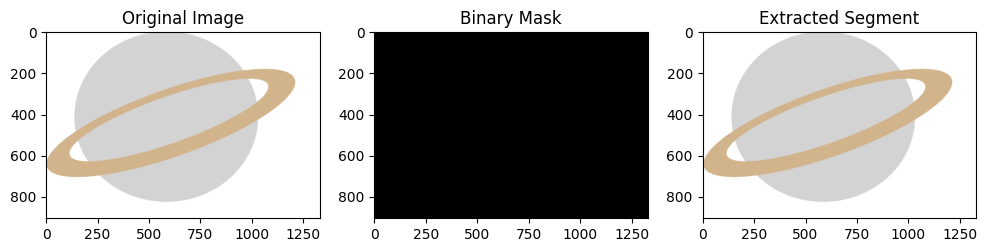

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
image_path = '/content/occlusion2_sol_rec.png'

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise ValueError("Image not loaded. Please check the path.")

# Convert to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Thresholding to create a binary image
_, binary_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours from the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the largest contour
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    extracted_segment = image[y:y + h, x:x + w]

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1), plt.imshow(image_rgb), plt.title("Original Image")
    plt.subplot(1, 3, 2), plt.imshow(binary_mask, cmap='gray'), plt.title("Binary Mask")
    plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(extracted_segment, cv2.COLOR_BGR2RGB)), plt.title("Extracted Segment")
    plt.show()

    # Save the extracted segment
    cv2.imwrite('/content/extracted_segment.png', extracted_segment)
else:
    print("No contours found.")
